In [1]:
import pandas as pd
df = pd.read_excel("Rawdata.xlsx")
df.head()


,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [2]:
df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [3]:
df["Name"] = df["Name"].str.replace(r"\W","", regex=True)
df["Domain"] = df["Domain"].str.replace(r"\W","", regex=True)
df["Location"] = df["Location"].str.replace(r"\W","", regex=True)


In [4]:
df.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year


In [5]:
df["Age"] = df["Age"].str.replace(r"\D","", regex=True)
df["Salary"] = df["Salary"].str.replace(r"\D","", regex=True)
df["Exp"] = df["Exp"].str.replace(r"\D","", regex=True)

In [6]:
df.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [8]:
clean_data = df.copy()

In [9]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [10]:
df["Exp"] = pd.to_numeric(df["Exp"])
df["Salary"] = pd.to_numeric(df["Salary"])
df.Salary.dtype, df.Exp.dtype

(dtype('int64'), dtype('float64'))

In [11]:
import numpy as np
df["Age"] = df["Age"].fillna(np.mean(pd.to_numeric(df["Age"])))

In [14]:
df["Exp"] = df["Exp"].fillna(np.mean(df["Exp"]))
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2.0
1,Teddy,Testing,45,Bangalore,10000,3.0
2,Umar,Dataanalyst,50.25,NaN,15000,4.0
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5.0
5,Kim,NLP,55,Delhi,60000,10.0


In [16]:
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2.0
1,Teddy,Testing,45,Bangalore,10000,3.0
2,Umar,Dataanalyst,50.25,Bangalore,15000,4.0
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5.0
5,Kim,NLP,55,Delhi,60000,10.0


In [19]:
loc =list(set(df.Location))
loc

['Mumbai', 'Hyderbad', 'Delhi', 'Bangalore']

In [23]:
ser = pd.Series(loc)
ser.mode()[1]

'Delhi'

In [ ]:

clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [26]:
#Since there is no one value that repeats most, .mode() returns a series of Location column and [0] is the first entry that we use to fill inplace of na values.
clean_data.Location.mode()

0    Bangalore
1        Delhi
2     Hyderbad
3       Mumbai
Name: Location, dtype: object

In [28]:
clean_data.Location.mode()[2]

'Hyderbad'

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6 non-null      object 
 1   Domain    6 non-null      object 
 2   Age       6 non-null      object 
 3   Location  6 non-null      object 
 4   Salary    6 non-null      int64  
 5   Exp       6 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 420.0+ bytes


In [32]:
df.Age = df.Age.astype(int)
df.Exp = df.Exp.astype(int)
df.Salary = df.Salary.astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int64 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int64 
 5   Exp       6 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 420.0+ bytes


In [35]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

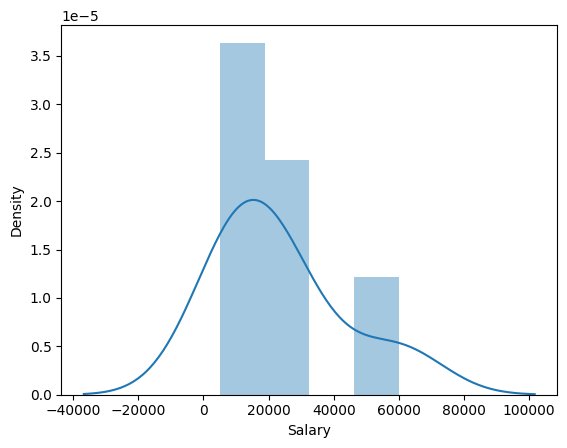

In [41]:
vis1 = sns.distplot(df.Salary)

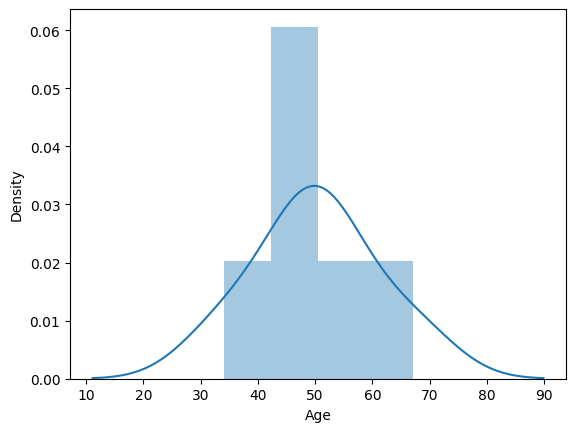

In [42]:
viss2 = sns.distplot(df.Age)

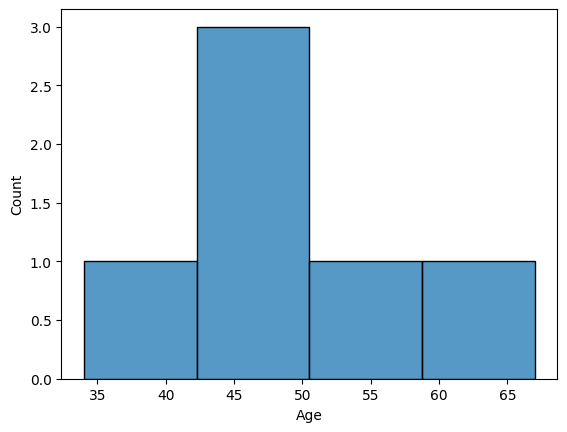

In [45]:
vis3 = sns.histplot(df.Age)

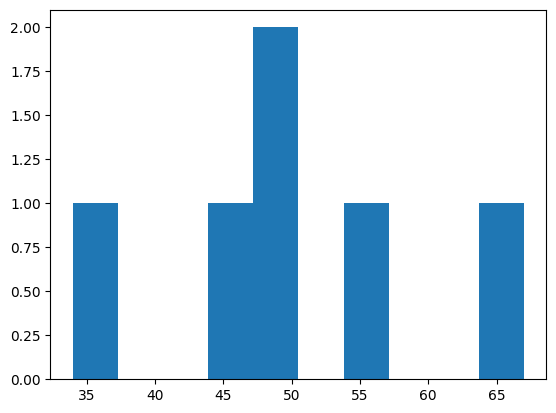

In [46]:
vis4 = plt.hist(df.Age)

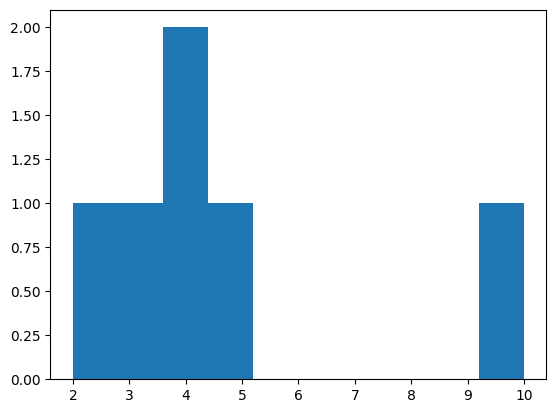

In [47]:
vis5 = plt.hist(df.Exp)

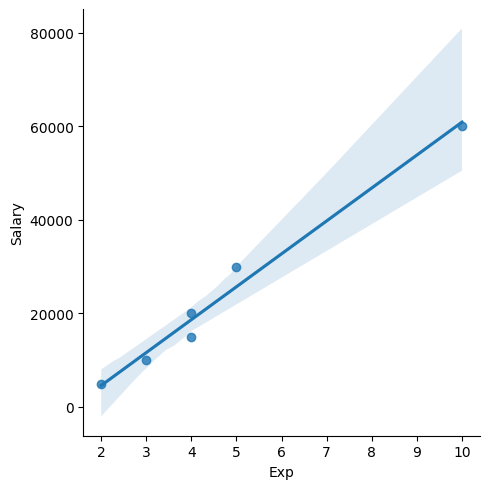

In [48]:
vis6 = sns.lmplot(data = df, x = "Exp", y = "Salary")

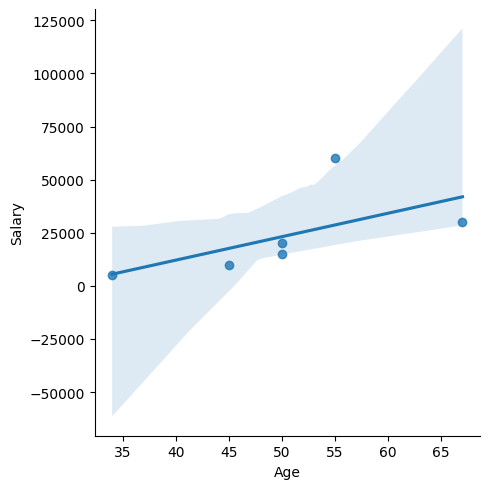

In [49]:
vis7 = sns.lmplot(data = df, x = "Age", y = "Salary")

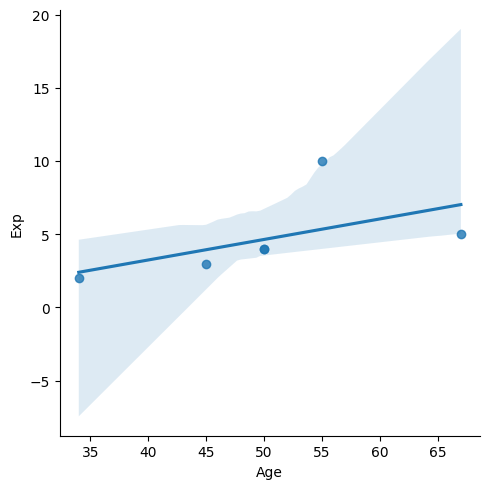

In [50]:
vis7 = sns.lmplot(data = df, x = "Age", y = "Exp")

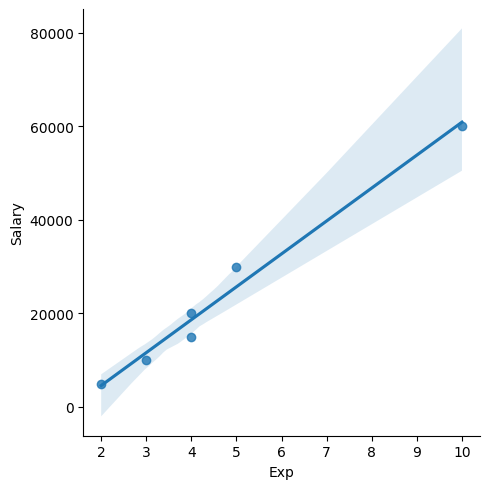

In [56]:
vis6 = sns.lmplot(data = df, x = "Exp", y = "Salary",fit_reg=True)

In [57]:
df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [60]:
# separating dependent and independent variable

x_iv = df[['Name', 'Domain','Location','Age','Exp']]
y_dv = df[["Salary"]]

In [61]:
x_iv

,Name,Domain,Location,Age,Exp
0,Mike,Datascience,Mumbai,34,2
1,Teddy,Testing,Bangalore,45,3
2,Umar,Dataanalyst,Bangalore,50,4
3,Jane,Analytics,Hyderbad,50,4
4,Uttam,Statistics,Bangalore,67,5
5,Kim,NLP,Delhi,55,10


In [62]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [65]:
imputation = pd.get_dummies(df).astype(int)
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
